## Import Libraries

In [1]:
import pandas as pd
import numpy as np

## Define Column Names

In [2]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race','sex', 'capital-gain','capital-loss','hours-per-week','native-country','income']

## Import adult.data

In [3]:
tr_data = pd.read_csv("data/adult.data",
                     names = names
                     )

## Import adult.data

In [4]:
ts_data = pd.read_csv("data/adult.test",
                     names = names
                     )

## Combining Two datasets to 1 single dataset

In [5]:
data = pd.concat([tr_data,ts_data])

In [6]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Removing Missing Values:
### Missing values are present only in workclass, occupation and native-country and are denoted with '?' hence dropping rows 

In [7]:
i = data[data['workclass'] == ' ?'].index
data = data.drop(i)
i = data[data['occupation'] == ' ?'].index
data = data.drop(i)
i = data[data['native-country'] == ' ?'].index
data = data.drop(i)

## fnlgwt doesnt have any effect on the income; education is just the description of education_num; relationship almost infers the marital-status;capital-gain and capital-loss have a lot of zero values which doesnt effect the prediction,,hence removing the columns

In [8]:
data = data.drop(['fnlwgt','education','relationship','capital-gain','capital-loss'], axis = 1)

In [9]:
data

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
5,37,Private,14,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,13,Never-married,Prof-specialty,White,Male,40,United-States,<=50K.
16276,39,Private,13,Divorced,Prof-specialty,White,Female,36,United-States,<=50K.
16278,38,Private,13,Married-civ-spouse,Prof-specialty,White,Male,50,United-States,<=50K.
16279,44,Private,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,40,United-States,<=50K.


## resetting indices for uniformity in visualtization

In [10]:
data = data.reset_index(drop=True)
#data = data.drop(['index'], axis = 1)

In [11]:
data

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
42955,33,Private,13,Never-married,Prof-specialty,White,Male,40,United-States,<=50K.
42956,39,Private,13,Divorced,Prof-specialty,White,Female,36,United-States,<=50K.
42957,38,Private,13,Married-civ-spouse,Prof-specialty,White,Male,50,United-States,<=50K.
42958,44,Private,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,40,United-States,<=50K.


## the income values have extra . at the end making the data inconsistent, hence modifying it

In [12]:
error = data['income'] == ' >50K.'
data.loc[error,'income'] = ' >50K'
error2 = data['income'] == ' <=50K.'
data.loc[error2,'income'] = ' <=50K'

data

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
42955,33,Private,13,Never-married,Prof-specialty,White,Male,40,United-States,<=50K
42956,39,Private,13,Divorced,Prof-specialty,White,Female,36,United-States,<=50K
42957,38,Private,13,Married-civ-spouse,Prof-specialty,White,Male,50,United-States,<=50K
42958,44,Private,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,40,United-States,<=50K


## checking whether above function worked

In [13]:
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

## transforming the data into continuous numeric values

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
data['workclass']=le.fit_transform(data['workclass'])
data['marital-status']=le.fit_transform(data['marital-status'])
data['occupation']=le.fit_transform(data['occupation'])
data['race']=le.fit_transform(data['race'])
data['sex']=le.fit_transform(data['sex'])
data['native-country']=le.fit_transform(data['native-country'])
data['income']=le.fit_transform(data['income'])

In [16]:
data

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,5,13,4,0,4,1,40,38,0
1,50,4,13,2,3,4,1,13,38,0
2,38,2,9,0,5,4,1,40,38,0
3,53,2,7,2,5,2,1,40,38,0
4,37,2,14,2,3,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...
42955,33,2,13,4,9,4,1,40,38,0
42956,39,2,13,0,9,4,0,36,38,0
42957,38,2,13,2,9,4,1,50,38,0
42958,44,2,13,0,0,1,1,40,38,0


## Summarizing statistics of the data features

In [17]:
data.describe()

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
count,42960.000000,42960.000000,42960.000000,42960.000000,42960.000000,42960.000000,42960.000000,42960.000000,42960.000000,42960.000000
mean,38.521392,2.204469,10.114525,2.581588,5.970740,3.678282,0.675698,40.940433,36.396206,0.248184
std,13.208408,0.955856,2.550747,1.499071,4.025352,0.835006,0.468119,12.002476,6.092070,0.431964
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,2.000000,2.000000,4.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,10.000000,2.000000,6.000000,4.000000,1.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,13.000000,4.000000,9.000000,4.000000,1.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,16.000000,6.000000,13.000000,4.000000,1.000000,99.000000,40.000000,1.000000


## visualizing the correlation between features

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

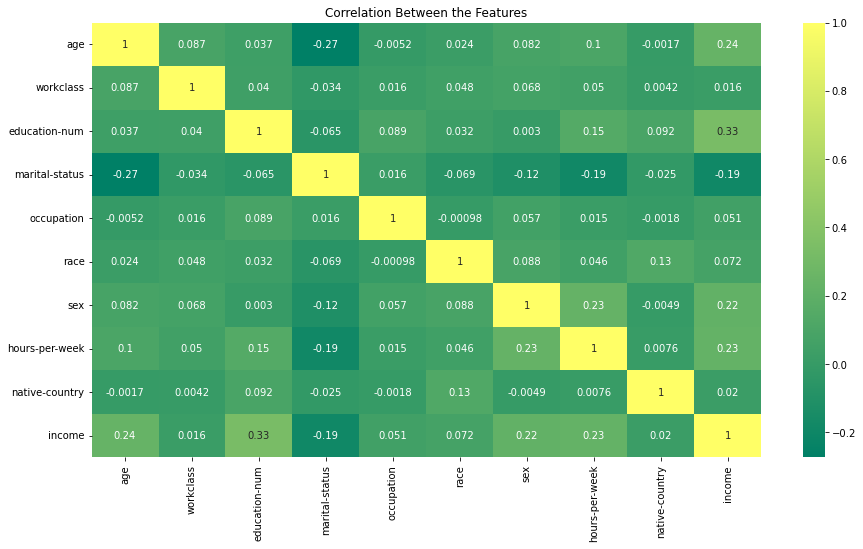

In [19]:
corr=data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='summer')
plt.title("Correlation Between the Features")
plt.show()

## Remove Features that does not effect the outcome much

In [20]:
data = data.drop(['marital-status', 'workclass', 'occupation','race', 'native-country'], axis = 1)

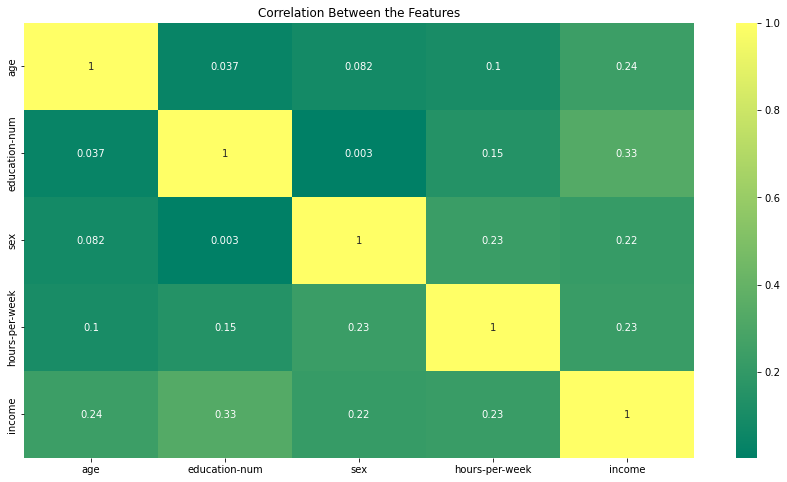

In [21]:
corr=data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='summer')
plt.title("Correlation Between the Features")
plt.show()

## Split the dataset into Train and Test sets

In [22]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(data,test_size = 0.3, random_state = np.random)

In [23]:
x_train=data_train.iloc[:,:-1] # Features
y_train=data_train.iloc[:,-1] # Target
x_train.shape,y_train.shape

((30072, 4), (30072,))

In [24]:
x_test=data_test.iloc[:,:-1] # Features
y_test=data_test.iloc[:,-1] # Target
x_test.shape,y_test.shape

((12888, 4), (12888,))

## Stats of number of data entries of each class

In [38]:
data_p = data[data['income'] == 0]

In [39]:
#data_p.shape

(32298, 5)

In [41]:
data_n = data[data['income'] == 1]

In [42]:
#data_n.shape

(10662, 5)